In [1]:
import glob
import sys
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
import torch.utils.data as td
import torchvision as tv 
import pandas as pd

ModuleNotFoundError: No module named 'cv2'

In [31]:
full_set = glob.glob("./JPEGImages/*.jpg")

In [32]:
training_set = random.sample(full_set, int(0.7*len(full_set)))
val_set = []
for i in range(len(full_set)):
    if full_set[i] not in training_set:
        val_set.append(full_set[i])

In [33]:
im=cv2.imread(training_set[2])

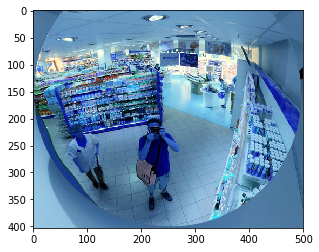

In [34]:
plt.imshow(im)

In [35]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
 

In [36]:
ss.setBaseImage(im)

In [37]:
ss.switchToSelectiveSearchQuality()

In [38]:
rects = ss.process()

In [39]:
print(len(rects))

7474


In [40]:
imOut = im.copy()

In [41]:
for i, rect in enumerate(rects):
            # draw rectangle for region proposal till numShowRects
            if (i < 300):
                x, y, w, h = rect
                bound_box = im[y:y+h, x:x+w]
                new_im = cv2.resize(bound_box, (228, 228))
                #cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)

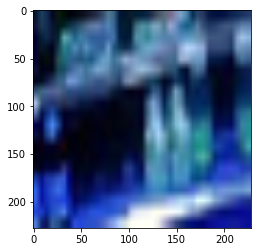

In [42]:
plt.imshow(new_im)

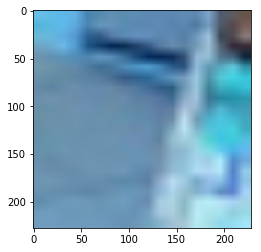

In [56]:
def selective_search(img):
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    ss.setBaseImage(img)
    ss.switchToSelectiveSearchQuality()
    rects = ss.process()
    np.random.shuffle(rects)
    bb_list = rects[0:2000]
    im_bb_list = list()
    for i in range(2000):
        x, y, w, h = bb_list[i]
        new_im = cv2.resize(img[y:y+h,x:x+w], (228, 228))
        im_bb_list.append(new_im)
    return im_bb_list

x = selective_search(im)
plt.imshow(x[0])
# convert each of this to a tensor for torch support